In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [17]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)

In [24]:
df.rename(columns={'v1':'target', 'v2':'features'}, inplace = True)

In [25]:
df.head()

,target,features
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
df['target'] = encoder.fit_transform(df['target'])

In [34]:
df.head()

,target,features
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x289f03050>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

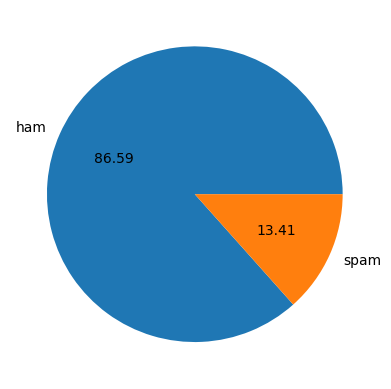

In [39]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")

In [47]:
import ssl
import nltk
print(nltk.data.path)

['/Users/tejprasadlamichhane/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [49]:
df['num_characters'] = df['features'].apply(len)

In [54]:
df.head()

,target,features,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
df['num_words'] = df['features'].apply(lambda x:len(nltk.word_tokenize(x)))

In [62]:
df.head()

,target,features,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [64]:
df['num_sentences'] = df['features'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [65]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
df[df['target']== 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [69]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

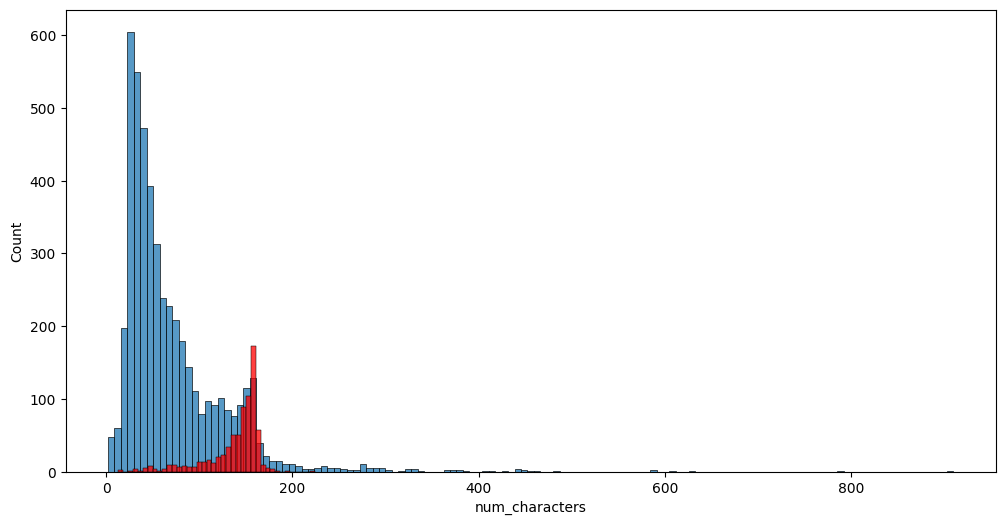

In [70]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

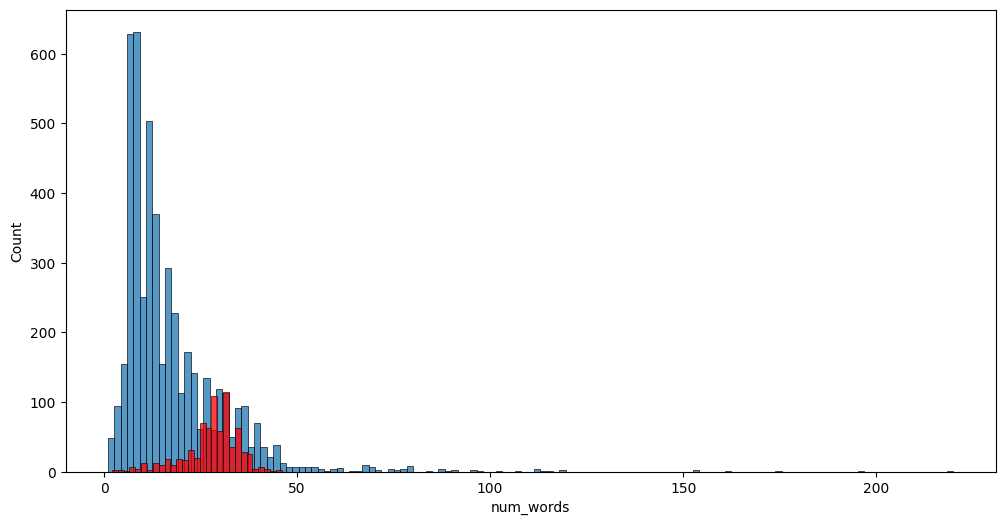

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

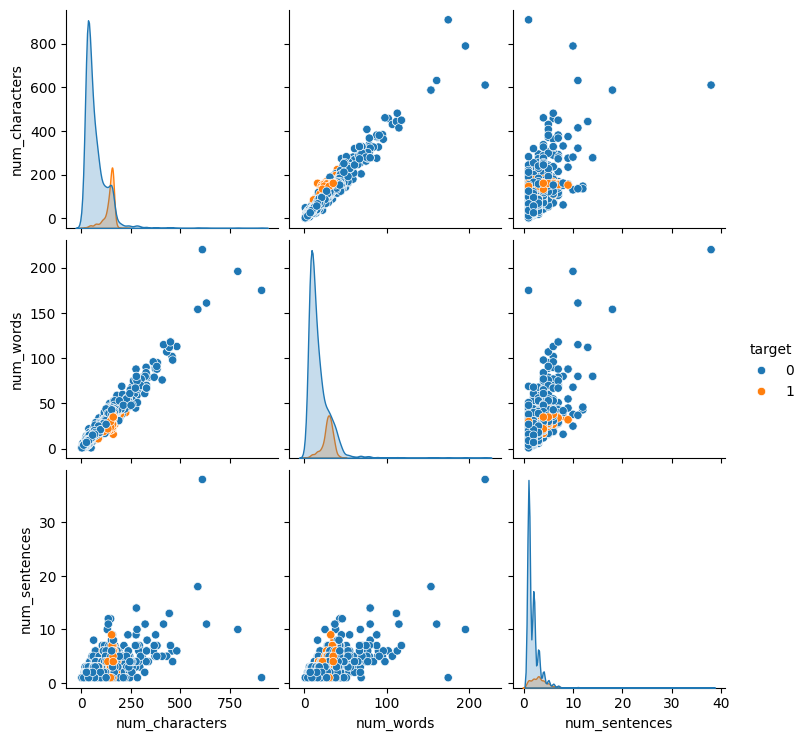

In [72]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing

In [86]:
import string
from nltk.corpus import stopwords

In [87]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [88]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [89]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [90]:
df['transformed_text'] = df['features'].apply(transform_text)

In [91]:
df.head()

,target,features,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 1.3 MB/s eta 0:00:00a 0:00:01m


In [94]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [95]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

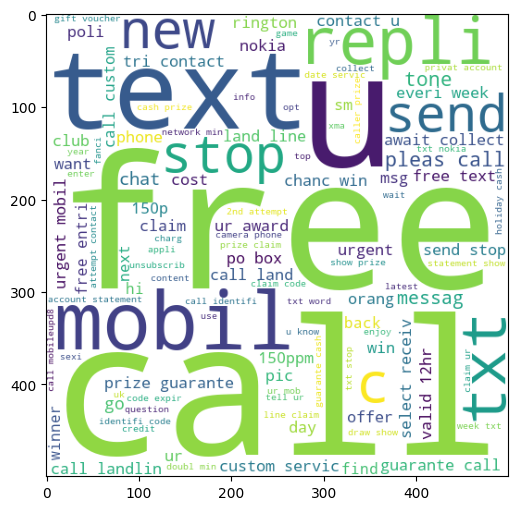

In [96]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [97]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

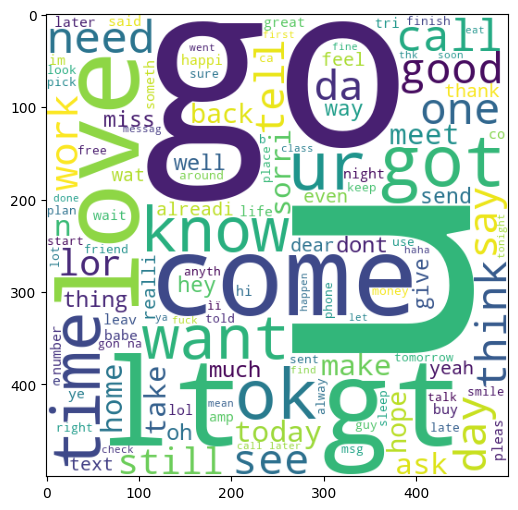

In [98]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [101]:
df.head()

,target,features,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [102]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [103]:
len(spam_corpus)

11490

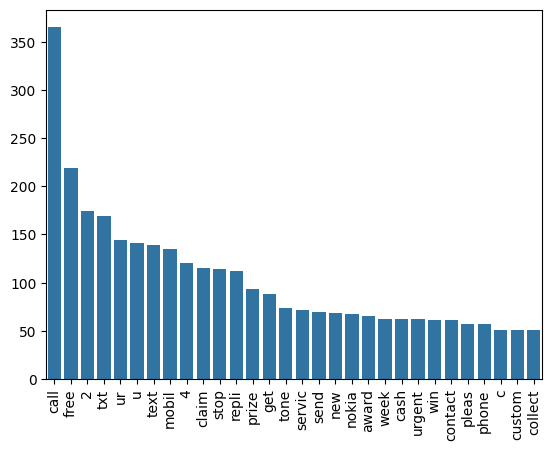

In [106]:
from collections import Counter

word_counts = Counter(spam_corpus)

# Extract the most common 30 words and their frequencies
most_common_words = word_counts.most_common(30)
words = [word[0] for word in most_common_words]
frequencies = [count[1] for count in most_common_words]

# Create a bar plot
sns.barplot(x=words, y=frequencies)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
ham_corpus = []
for sent in df[df['target']==0]['transformed_text'].tolist():
    for word in sent.split():
        ham_corpus.append(word)

In [108]:
len(ham_corpus)

38221

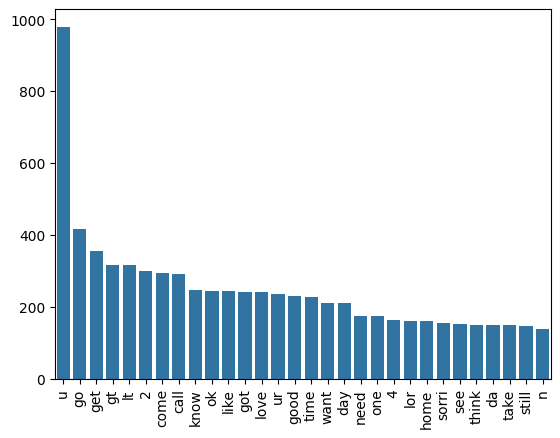

In [110]:

ham_word_counts = Counter(ham_corpus)

# Extract the most common 30 words and their frequencies
most_common_words = ham_word_counts.most_common(30)
words = [word[0] for word in most_common_words]
frequencies = [count[1] for count in most_common_words]

# Create a bar plot
sns.barplot(x=words, y=frequencies)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [179]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=8000)

In [180]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [181]:
X.shape

(5572, 6708)

In [182]:
y = df['target'].values

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [185]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [186]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [187]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [188]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [189]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [191]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [192]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [193]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [194]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9659192825112107, 0.9761904761904762)

In [195]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9659192825112107
Precision -  0.9761904761904762
For  KN
Accuracy -  0.8986547085201794
Precision -  1.0
For  NB
Accuracy -  0.957847533632287
Precision -  1.0
For  DT
Accuracy -  0.9255605381165919
Precision -  0.8712871287128713
For  LR
Accuracy -  0.9443946188340807
Precision -  0.9444444444444444
For  RF
Accuracy -  0.9650224215246637
Precision -  0.983739837398374


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9533632286995516
Precision -  0.9344262295081968
For  BgC
Accuracy -  0.9587443946188341
Precision -  0.9242424242424242
For  ETC
Accuracy -  0.9695067264573991
Precision -  1.0
For  GBDT
Accuracy -  0.9426008968609866
Precision -  0.9607843137254902
For  xgb
Accuracy -  0.9668161434977578
Precision -  0.984


In [196]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [197]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
8,ETC,0.969507,1.000000
10,xgb,0.966816,0.984000
5,RF,0.965022,0.983740
0,SVC,0.965919,0.976190
9,GBDT,0.942601,0.960784
4,LR,0.944395,0.944444
6,AdaBoost,0.953363,0.934426
7,BgC,0.958744,0.924242


In [199]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(etc, open('model.pkl', 'wb'))